In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import pandas as pd
import os
import sklearn as sk
import plotly.express as px

In [2]:
core_path = './data'
train_df = pd.read_csv( os.path.join(core_path, 'train.csv.gz'))

In [22]:
sorted_data = train_df.sort_values("labels")

In [65]:
selected_genes = ["Mid1", "Polr1b", "Hexb", "Gm42418", "Gm11867", "Camk1d", "Gm47283", "Gm26917", "AY036118", "Sec61a1", "Lrp1", "Rsrp1", "Snrnp70"]
cluster_data = sorted_data[selected_genes]
cluster_data

,Mid1,Polr1b,Hexb,Gm42418,Gm11867,Camk1d,Gm47283,Gm26917,AY036118,Sec61a1,Lrp1,Rsrp1,Snrnp70
0,0.000000,2.190380,1.839343,4.081200,0.000000,3.312804,1.293686,2.971615,2.449695,0.000000,2.825965,2.449695,2.190380
1631,0.000000,1.056338,2.505928,4.280564,0.000000,2.983569,1.056338,2.648353,3.234185,1.056338,2.772999,2.505928,2.140452
1630,0.000000,0.741471,2.027376,4.327220,0.000000,3.525497,0.000000,2.162536,3.225990,0.741471,2.027376,2.387955,1.457932
3456,1.072131,1.072131,2.361608,4.194708,1.577575,3.006474,1.072131,2.670777,2.670777,1.072131,2.161758,2.670777,1.911732
1626,0.000000,0.839601,1.902145,3.656082,0.363588,2.738895,1.160775,2.134661,1.965536,0.629655,1.683582,2.185226,2.279278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,0.000000,0.000000,0.529556,1.129637,0.000000,2.554823,0.873949,0.000000,1.129637,0.000000,0.000000,0.000000,0.873949
3573,0.000000,0.000000,0.000000,1.470410,0.000000,2.844711,0.750003,0.000000,1.698918,0.000000,0.000000,0.443726,1.333030
1508,0.000000,0.000000,0.539921,1.521558,0.000000,1.666805,0.000000,0.888608,1.351569,0.539921,1.146644,1.521558,1.666805
1493,0.000000,0.000000,0.000000,0.861567,0.000000,2.058516,0.000000,0.375434,1.317409,0.375434,0.000000,1.317409,1.037619


In [66]:
sorted_data

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,AC163611.1,AC163611.2,AC140365.1,AC124606.2,AC124606.1,AC133095.2,AC133095.1,AC234645.1,AC149090.1,labels
0,2.190380,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.293686,CBP
1631,1.891222,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.558490,CBP
1630,3.755669,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CBP
3456,1.911732,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.906594,CBP
1626,2.481737,0.000000,0.363588,0.0,0.0,0.0,0.0,0.0,0.363588,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.289477,CBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,2.607655,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.772788,eGFP
3573,3.219501,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.984140,eGFP
1508,2.007252,0.000000,0.539921,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.793607,eGFP
1493,3.129821,0.375434,0.647755,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.432547,eGFP


In [67]:
type = sorted_data['labels']
lut = dict(zip(type.unique(), "rbg"))
row_colors = type.map(lut)

In [71]:
lut

{'CBP': 'r', 'KAT5': 'b', 'eGFP': 'g'}

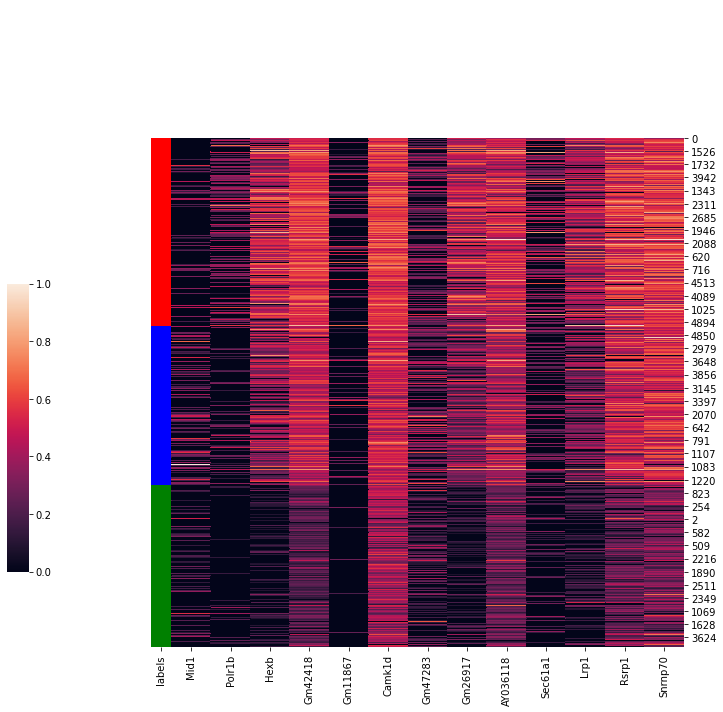

In [70]:
sns.clustermap(cluster_data, standard_scale=1, row_colors=row_colors, row_cluster=False, col_cluster=False, cbar_pos=(0, .2, .03, .4))

# CBP: red  |  KAT5: blue | eGFP: green